## Assignment 7: Neural Networks using Keras and Tensorflow

Please see the associated document for questions

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [55]:
# pip install tensorflow

In [56]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
from keras.utils import to_categorical
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [57]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

# Load MNIST handwritten digit data
(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert lbl_train.shape == (60000,)
assert lbl_test.shape == (10000,)

# 'channels_first' means that the color channels of an image tensor are the first dimension in the tensor, followed by the spatial dimensions (height and width). An image tensor would have shape (samples, channels, height, width).
# 'channels_last' means that the color channels of an image tensor are the last dimension in the tensor, after the spatial dimensions. In the channels_last format, an image tensor would have shape (samples, height, width, channels).
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

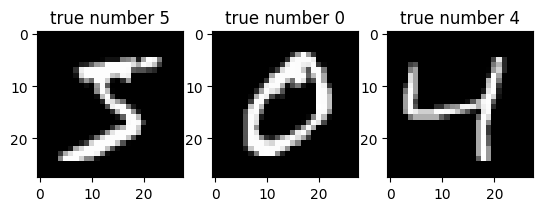

In [58]:
# plot first few images in x_train dataset
for i in range(3):
    plt.subplot(1,3,i+1)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title('true number {}'.format(lbl_train[i]))
# show the figure
plt.show()

#### **1. Preprocessing**

In [59]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)

##### **Q1.1** Explain the data pre-processing highlighted in the notebook.

**Answer:** 
- First, convert the x data type from integers to 32-bit floating point number which is common used when training a neural network. This is because float32 provides sufficient precision, and also many modern processors are optimized for float32 operations.
- Second, since the pixel values for each image in the dataset are unsigned integers ranging from 0(black) to 255(white), the input features are scaled/normalised between 0.0 and 1.0. Rescaling can also help to prevent the model from being influenced too much by features with a large range of values.
- Third, y dataset was converted to binary class matrix (ten output neurons). The reason we set this is because we want the model to make a prediction for each possible class. Each output neuron corresponds to a different class, and the value of that neuron represents the probability that the input image belongs to that class.

#### **2. Network model, training, and changing hyper-parameters**

In [60]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4758 - accuracy: 0.8644 - val_loss: 0.2512 - val_accuracy: 0.9289
Epoch 2/10
469/469 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9328 - val_loss: 0.1990 - val_accuracy: 0.9425
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1748 - accuracy: 0.9492 - val_loss: 0.1583 - val_accuracy: 0.9537
Epoch 4/10
469/469 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.9582 - val_loss: 0.1435 - val_accuracy: 0.9578
Epoch 5/10
469/469 [==============================] - 0s 1ms/step - loss: 0.1212 - accuracy: 0.9645 - val_loss: 0.1178 - val_accuracy: 0.9644
Epoch 6/10
469/469 [==============================] - 0s 1ms/step - loss: 0.1053 - accuracy: 0.9692 - val_loss: 0.1230 - val_accuracy: 0.9631
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0928 - accuracy: 0.9723 - val_loss: 0.1037 - val_accuracy: 0.9688
Epoch 

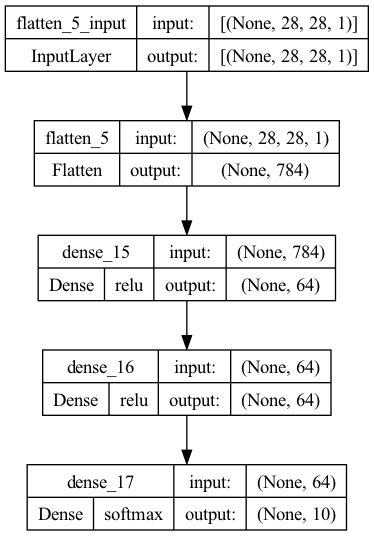

In [61]:
# Converts a Keras model to dot format and save to a file.
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [62]:
# get a summary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### **Q2.1** How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why do the input and output layers have the dimensions they have?

**Answer:** 

According to the plot and summary of the model above, we can conclude,

+ There are 4 layers in the network, the input layer has 784 neurons, the two hidden layers both have 64 neurons and the output layer has 10 neurons.
+ The two hidden layers use activation function 'relu (rectified linear unit)', $f(x) = max(0,x)$, the reason we use this activation function is because it is computationally efficient, effective at reducing the impact of the vanishing gradient problem, and able to learn complex nonlinear relationships in the input data.
+ The output layer use activation function 'softmax', because 'Softmax' function converts a vector of values to a probability distribution which means the elements of the output vector are in range (0, 1) and sum to 1. In this case, this is what we want to output - the value of each neuron represents the confidence that the input image belongs to the corresponding number.
+ The total number of parameters for this network is 55050.
+ The input layer have the dimension $784 = 28*28$, this is because neural network models require the input to be a one-dimensional vector, thus 28x28 input image was flatten into a one-dimensional vector of length 784.
+ The output layer have the dimension 10, this is because the handwritten digit range from 0 to 9, therefore, we use 10 output neurons, one for each possible number.

##### **Q2.2** What loss function is used to train the network? What is the functional form (a mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

**Answer:**

The loss function used to train the network is 'categorical_crossentropy' function, it is commonly used when there are multiple label classes and one_hot representation in output. in this case, since we have 10 classes, thus it is appropriate to use this loss function. The mathematical expression of this function is as follows,

$Loss = - \frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C \bold{1}_{y_{i} \in{C_{c}}}  log p_{model}[{y_{i} \in{C_{c}}}]$

where $N$ is the number of samples in the dataset, $C$ is the number of classes(10), $\bold{1}_{y_{i} \in{C_{c}}}$ is the indicator function that takes value 1 if the $i$-th instance belongs to class $c$, and 0 otherwise.
The $p_{model}[{y_{i} \in{C_{c}}}]$ is the probability predicted by the model for the 'i'th observation to belong to the 'c'th category.

The loss function computes the average negative log-likelihood of the predicted probability distribution over all instances in the dataset. It measures the difference between the true label distribution and the predicted label distribution and tries to minimize it during the training process.

A lower value of the loss function indicates that the model is making more accurate predictions. Conversely, a higher value of the loss function indicates that the model is making less accurate predictions.







##### **Q2.3** Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


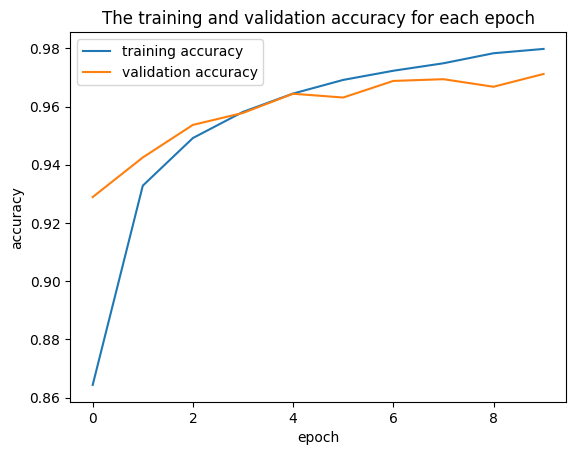

In [63]:
# list all data in history
print(fit_info.history.keys())

plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('The training and validation accuracy for each epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

##### **Q2.4** Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights(kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

In [69]:
import numpy as np

epochs = 40
L2 = np.linspace(0.000001,0.001,5)

accuracy_matrix = np.zeros([3,5],dtype=np.float32)

for l2 in L2:
    for i in range(3):
        model = Sequential()
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(l2 = l2)))
        model.add(Dense(300, activation = 'relu',kernel_regularizer=keras.regularizers.L2(l2 = l2)))
        model.add(Dense(num_classes, activation='softmax'))
        
        model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer=tensorflow.keras.optimizers.legacy.SGD(learning_rate = 0.1), 
                      metrics=['accuracy'])

        fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=0,
           validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        print('When l2 = {}, train No.{} network, Validation accuracy is {}'.format(l2, i, score[1]))
        accuracy_matrix[i][np.where(L2 == l2)[0][0]] = score[1]

When l2 = 1e-06, train No.0 network, Validation accuracy is 0.9825000166893005
When l2 = 1e-06, train No.1 network, Validation accuracy is 0.9815000295639038
When l2 = 1e-06, train No.2 network, Validation accuracy is 0.9822999835014343
When l2 = 0.00025075000000000005, train No.0 network, Validation accuracy is 0.9828000068664551
When l2 = 0.00025075000000000005, train No.1 network, Validation accuracy is 0.9819999933242798
When l2 = 0.00025075000000000005, train No.2 network, Validation accuracy is 0.983299970626831
When l2 = 0.0005005000000000001, train No.0 network, Validation accuracy is 0.983299970626831
When l2 = 0.0005005000000000001, train No.1 network, Validation accuracy is 0.9817000031471252
When l2 = 0.0005005000000000001, train No.2 network, Validation accuracy is 0.9812999963760376
When l2 = 0.0007502500000000002, train No.0 network, Validation accuracy is 0.9815000295639038
When l2 = 0.0007502500000000002, train No.1 network, Validation accuracy is 0.9829999804496765
Wh

In [70]:
accuracy_matrix

array([[0.9825, 0.9828, 0.9833, 0.9815, 0.9815],
       [0.9815, 0.982 , 0.9817, 0.983 , 0.9783],
       [0.9823, 0.9833, 0.9813, 0.9818, 0.9803]], dtype=float32)

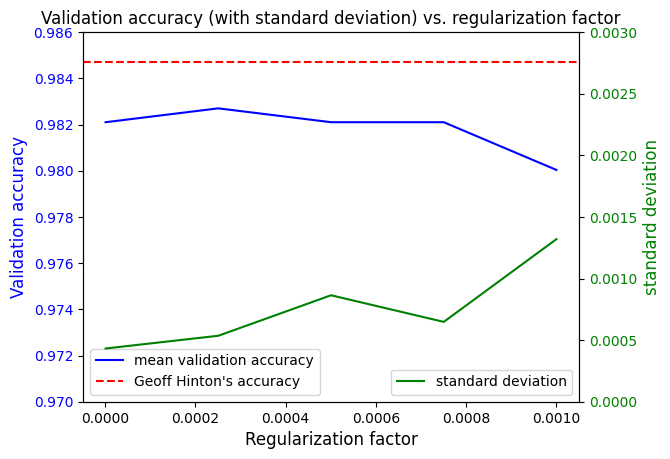

In [119]:
accuracy_mean = np.mean(accuracy_matrix, axis=0)
accuracy_std = np.std(accuracy_matrix, axis=0)

# plot 
fig, ax1 = plt.subplots()
 
ax1.set_xlabel('Regularization factor', fontsize=12)
ax1.set_ylabel('Validation accuracy', color = 'b', fontsize=12)
ax1.plot(L2, accuracy_mean, color = 'b', label = 'mean validation accuracy')
ax1.axhline(y=0.9847, color = 'r', linestyle='--', label = "Geoff Hinton's accuracy")
ax1.tick_params(axis ='y', labelcolor = 'b')
ax1.set_ylim(0.97,0.986)
 
# Adding Twin Axes
ax2 = ax1.twinx()
ax2.set_ylabel('standard deviation', color = 'g',fontsize=12)
ax2.plot(L2, accuracy_std, color = 'g', label = 'standard deviation')
ax2.tick_params(axis ='y', labelcolor = 'g')
ax2.set_ylim(0,0.003)

ax1.legend(loc=0)
ax2.legend(loc='lower right')

plt.title('Validation accuracy (with standard deviation) vs. regularization factor', fontsize=12)
plt.show()

In [128]:
average_accuracy = np.mean(accuracy_matrix)
print(f'The average accuracy we can get is {average_accuracy}.')
rate = average_accuracy/(0.9847)*100
print(f"The average accuracy we can get is {rate:.1f}% close to Geoff Hinton's accuracy.")

The average accuracy we can get is 0.9818066954612732.
The average accuracy we can get is 99.7% close to Geoff Hinton's accuracy.


#### **3. Convolutional layers**

##### **Q3.1** Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

##### **Q3.2** Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?